In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector

# Application Data

356255 Applications

In [7]:
# Load the training data for current applications
df_app_train = pd.read_csv('./data/application_train.csv')

In [8]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


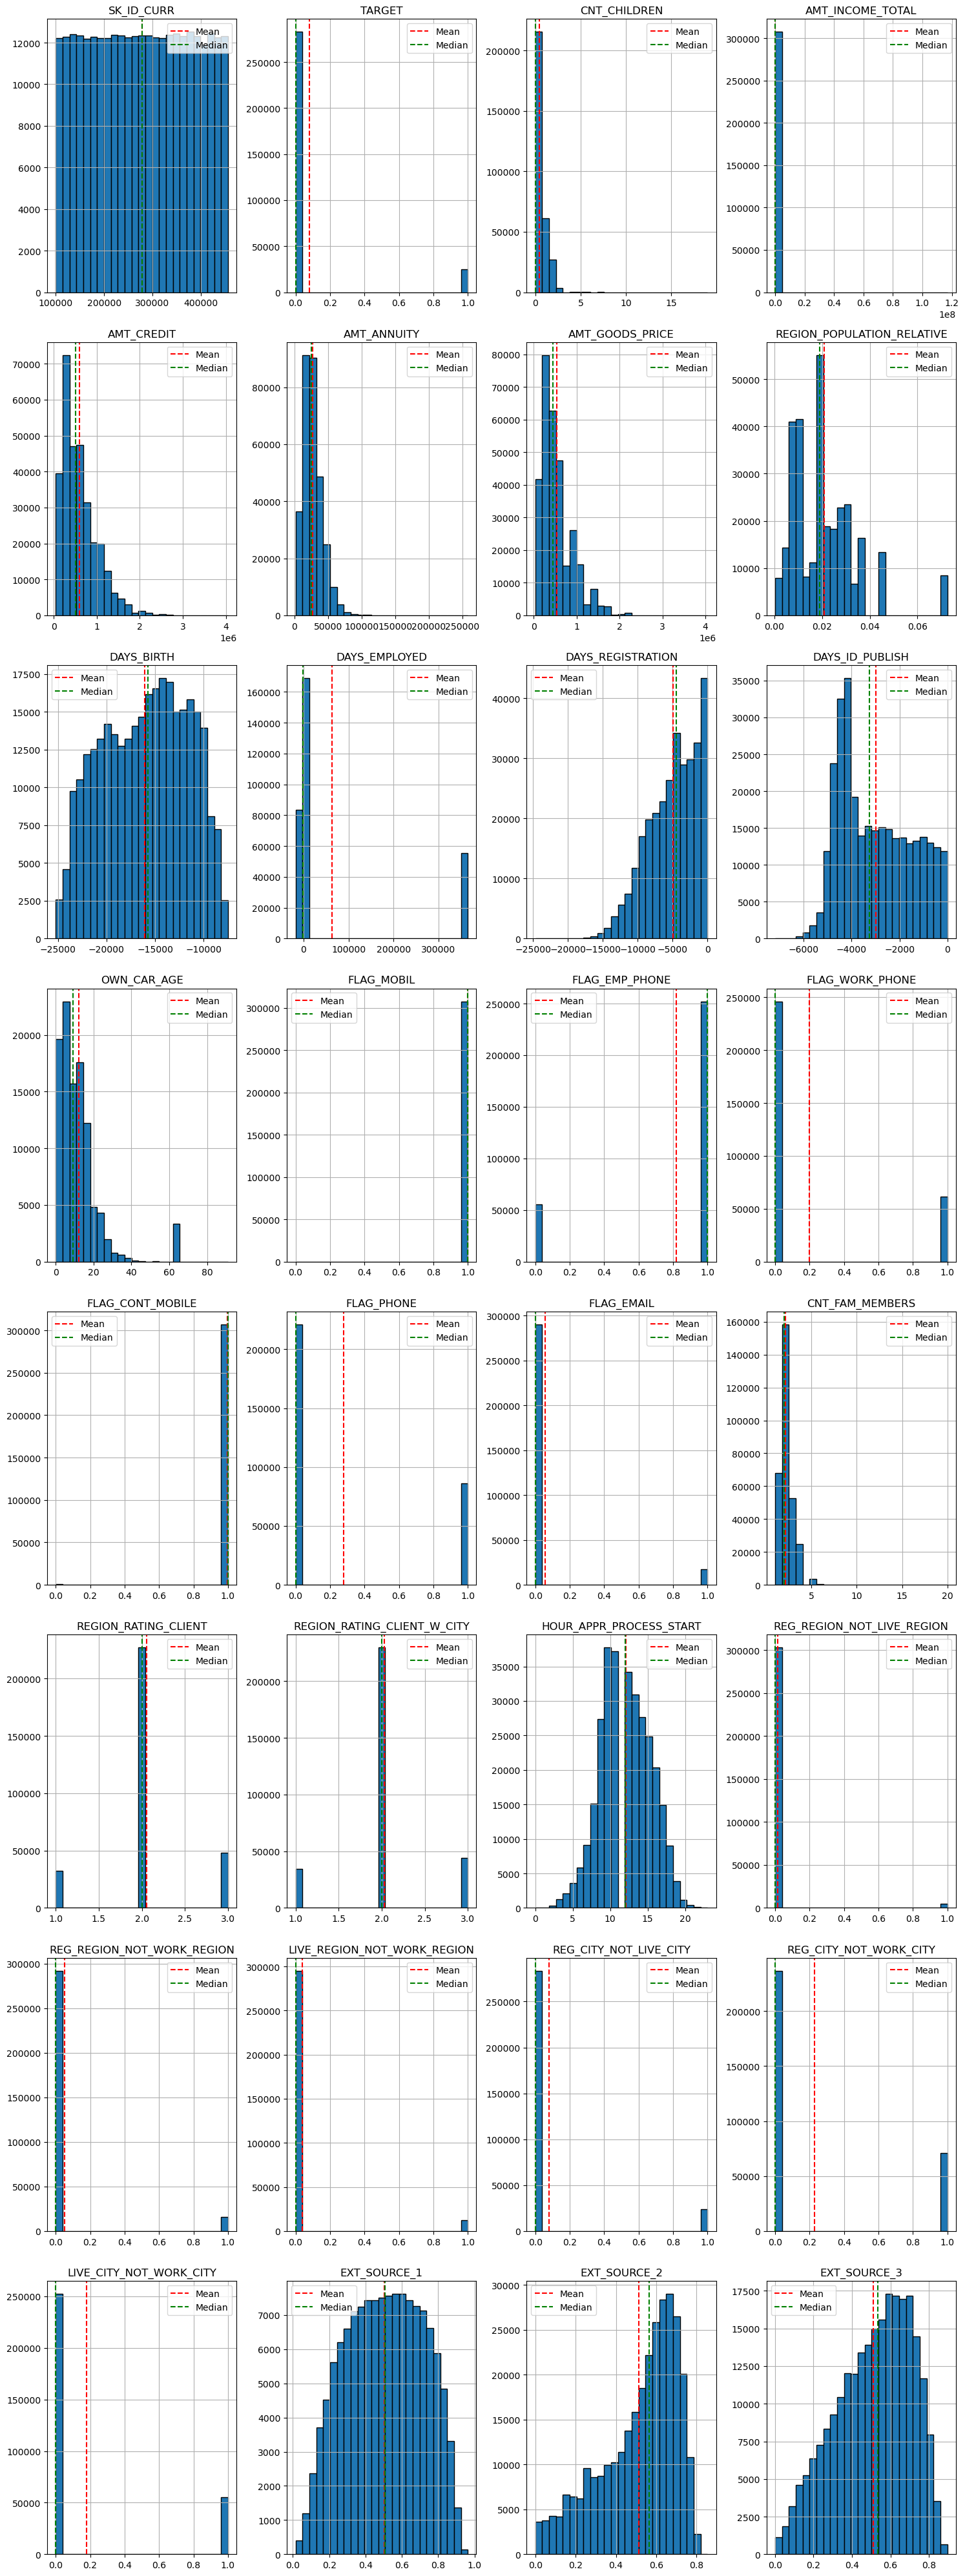

In [30]:
import math

columns_to_visualize = df_app_train.select_dtypes('number').columns.to_list()[0:32]
df_numeric = df_app_train.select_dtypes('number')

# Calculate the number of rows and columns for subplots
num_cols = len(columns_to_visualize)
num_rows = math.ceil(num_cols / 4)  # Adjust the number '3' as needed

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(15, num_rows*5))

# Plot histograms on subplots
for i, col in enumerate(columns_to_visualize):
    row = i // 4
    col_index = i % 4
    df_numeric[col].hist(ax=axes[row, col_index], bins=25, edgecolor='black')
    axes[row, col_index].set_title(col)
    
    # Add mean and median
    mean_val = df_numeric[col].mean()
    median_val = df_numeric[col].median()
    axes[row, col_index].axvline(mean_val, color='red', linestyle='--', label='Mean')
    axes[row, col_index].axvline(median_val, color='green', linestyle='--', label='Median')
    axes[row, col_index].legend()

plt.tight_layout()
plt.show()